# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

I would use differentialabundance (https://nf-co.re/differentialabundance/)

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep="\t")
samples = df.columns[2:]
samplesheet = pd.DataFrame({
    'sample': samples,
    'Condition': ['_'.join(sample.split('_')[:2]) for sample in samples],
    'replicate': [sample.split('_')[-1] for sample in samples]
})
samplesheet.to_csv("data/samplesheet.csv", index=False)

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [8]:
 nextflow run nf-core/differentialabundance \
     --input notebooks/day_03/data/samplesheet.csv \
     --contrasts notebooks/day_03/data/contrasts.csv \
     --matrix notebooks/day_03/data/salmon.merged.gene_counts.tsv \
     --outdir notebooks/day_03/output  \
     -profile rnaseq,docker \
     -r 1.5.0 \
     --max_memory "4GB"

SyntaxError: invalid syntax (3298209884.py, line 1)

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

    input is the samplesheet I created earlier
    contrasts was given
    matrix was given
    outdir chosen arbitrarily
    profiles set as docker and rnaseq because of the data we're using (not microarray)

What were the outputs of the pipeline?

The outputs include folders named other, pipeline_info, plots, report, shinyngs_app, tables. The most important being plots and tables.

Would you exclude any samples? If yes, which and why?

SNI sal 2 and SNI sal 4 are very separated from the others when looking at the pca plots (visible in 2d but very clear in the 3d version). This could skew the whole analysis and maybe they should be treated as outliers, removing them could lead to a more accurate analysis on the rest of the samples.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

SNI_oxy versus SNI_Sal: 1 gene is up regulated, 17 are down regulated

Sham_oxy versus Sham_Sal: 7 genes are up regulated, none are down regulated

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc refers to Nucleus Accumbens, a subcortical brain structure associated with reward, pleasure and addiction. It also has a role in pain processing.

mPFC is a brain region important for social cognition, self-referential processing, emotional regulation and stress-sensitive behaviors. It also plays a role in stress response modulation. 

VTA refers to the Ventral Tegmental Area, it is the origin of dopaminergic cell bodies of dopamine pathways, it also plays a role in reward cognition.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

The authors attach a table in which we can look up genes and their position

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No it is not sufficient, the genes must be interpreted together. The publication states we should look at pathways in which the DE genes are found, they also compare overlap across brain regions and conditions. 

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

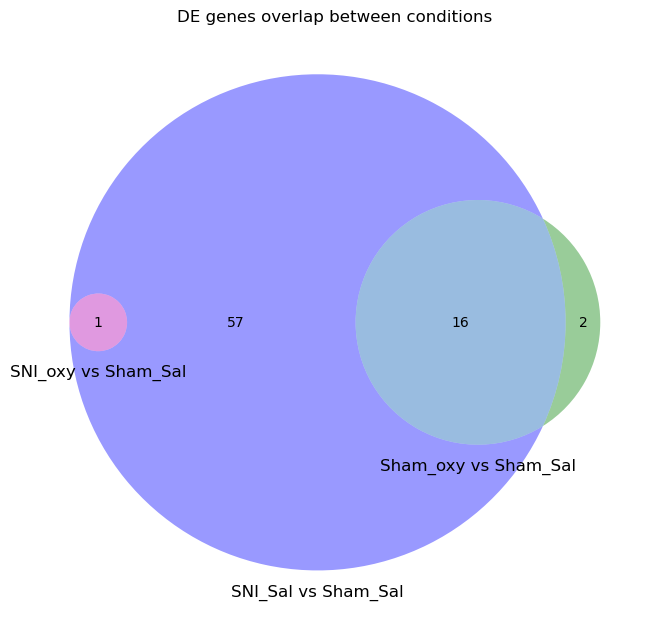

In [21]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

files = {
    "SNI_oxy_vs_Sham_Sal": "output/tables/differential/SNI_oxy_vs_Sham_Sal.deseq2.results_filtered.tsv",
    "Sham_oxy_vs_Sham_Sal": "output/tables/differential/condition_control_treated.deseq2.results_filtered.tsv",
    "SNI_Sal_vs_Sham_Sal": "output/tables/differential/SNI_Sal_vs_Sham_sal.deseq2.results_filtered.tsv"
}


gene_sets = {name: set(pd.read_csv(path, sep='\t')['gene_id']) for name, path in files.items()}

plt.figure(figsize=(8,8))
venn3(subsets=(gene_sets["SNI_oxy_vs_Sham_Sal"], gene_sets["Sham_oxy_vs_Sham_Sal"], gene_sets["SNI_Sal_vs_Sham_Sal"]), set_labels=("SNI_oxy vs Sham_Sal", "Sham_oxy vs Sham_Sal", "SNI_Sal vs Sham_Sal"))
plt.title("DE genes overlap between conditions")
plt.show()

In [13]:
!ls

data  day_03.ipynb  output
